In [286]:
# Don't forget to conda install bokeh in your terminal

from bokeh.plotting import figure, output_notebook, output_file, show

# Put your data here for now, import later
dist = [1.7, 2.2, 3.6, 4.8, 5.2, 6.4, 7.5, 8.8, 9.3, 10.8]
elev = [-12, -15, -1, 3, 0, -2, 24, 4, -1, -8]

In [287]:
# This code modified from https://bokeh.pydata.org/en/latest/docs/gallery/logaxis.html
# prepare some data
# x = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
# y0 = [i**2 for i in x]
# y1 = [10**i for i in x]
# y2 = [10**(i**2) for i in x]

# output to static HTML file
output_notebook()
output_file('file.html')

# create a new plot
p = figure(
    tools="pan,box_zoom,reset,save",
    y_range=[-30, 30], title="modified log axis example",
    x_axis_label='Distance along Transect (km)', y_axis_label='Elevation'
)

# add some renderers
p.line(dist, elev, line_color = "black")
p.circle(dist, elev, legend="Sample data", line_color="red", fill_color = 'orange', size=8)
# p.circle(x, x, legend="y=x", fill_color="white", size=8)
# p.line(x, y0, legend="y=x^2", line_width=3)
# p.line(x, y1, legend="y=10^x", line_color="red")
# p.circle(x, y1, legend="y=10^x", fill_color="red", line_color="red", size=6)
# p.line(x, y2, legend="y=10^x^2", line_color="orange", line_dash="4 4")

# show the results
show(p)

Loading BokehJS ...

INFO:bokeh.io.state:Session output file 'file.html' already exists, will be overwritten.


In [288]:
import numpy as np
import pandas as pd
import csv
# Need to upload your test csv
# data = pd.read_csv('TestData.csv')
data = pd.read_csv('TestData2.csv')
data

Transect  YYYY  Pt1
0          1  2003   -1
1          2  2003   -1
2          3  2003   -1
3          4  2003    3
4          5  2003    0
5          6  2003    3
6          7  2003   -5
7          8  2003   -2
8          9  2003   -1
9         10  2003   -2
10         1  2012   -7
11         2  2012  -10
12         3  2012    4
13         4  2012   -3
14         5  2012    5
15         6  2012    8
16         7  2012    0
17         8  2012   -3
18         9  2012   -5
19        10  2012    1
20         1  2015  -12
21         2  2015  -12
22         3  2015   -1
23         4  2015    3
24         5  2015    0
25         6  2015    2
26         7  2015   -7
27         8  2015   -8
28         9  2015  -10
29        10  2015   -4
30         1  2016   -7
31         2  2016  -10
32         3  2016    4
33         4  2016    8
34         5  2016    5
35         6  2016    8
36         7  2016    0
37         8  2016   -3
38         9  2016   -5
39        10  2016    1

In [289]:
# ipywidget slider data from https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html
import ipywidgets as widgets
widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider(value=7, continuous_update=False, description='Test:', max=10)

In [300]:
# Playing with Holoview
# install dependencies in terminal conda install -c pyviz holoviews bokeh matplotlib plotly
# this code modified from here: http://holoviews.org/gallery/demos/bokeh/dropdown_economic.html
import holoviews as hv

key_dimensions = [('Transect', 'Transect Points'), ('YYYY', 'Year')]
value_dimensions = [('Pt1','Annual Elevation Change [m]')]

macro = hv.Table(data, key_dimensions, value_dimensions)

## Plot the stuff
%opts Overlay [width=700 height=400 show_frame=False]
%opts Curve (color='lightgray') Scatter [color_index=2 size_index=2 scaling_factor=1.4] (cmap='Blues' line_color='k')

elev_graph = macro.to.curve('Transect Points', 'Annual Elevation Change [m]')
elev_scatter = macro.to.scatter('Transect Points', ['Annual Elevation Change [m]', 'Annual Elevation Change [m]'])
elev_graph * elev_scatter

:HoloMap   [YYYY]
   :Overlay
      .Curve.I   :Curve   [Transect]   (Pt1)
      .Scatter.I :Scatter   [Transect]   (Pt1,Pt1)

In [291]:
# Let's get into the data, calculate some basic stats, and then throw it into a table

# View the data again
# data # this is a pandas dataframe object

# Try to group changes in elevation values by image
grouped = data.groupby('YYYY').groups

# Check out the grouped elev data in a list format
# list(data['Pt1'].groupby(data['YYYY']))

# Calculate all the stats by image - from https://chrisalbon.com/python/data_wrangling/pandas_apply_operations_to_groups/
data['Pt1'].groupby(data['YYYY']).describe()
# data['Pt1'].groupby(data['YYYY']).agg([np.min, np.max, np.mean, np.sum, np.std])

count  mean       std   min   25%  50%   75%  max
YYYY                                                   
2003   10.0  -0.7  2.359378  -5.0 -1.75 -1.0 -0.25  3.0
2012   10.0  -1.0  5.656854 -10.0 -4.50 -1.5  3.25  8.0
2015   10.0  -4.9  5.685264 -12.0 -9.50 -5.5 -0.25  3.0
2016   10.0   0.1  6.261878 -10.0 -4.50  0.5  4.75  8.0

2003
2012
2015
2016


:Overlay
   .Curve.I   :Curve   [Transect]   (Pt1)
   .Curve.II  :Curve   [Transect]   (Pt1)
   .Curve.III :Curve   [Transect]   (Pt1)
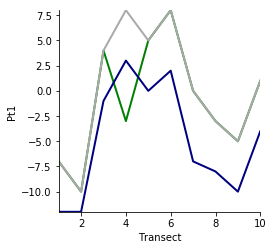

In [292]:
# Can we get fancy now?  See what holoviews can do, and bokeh!
# color_cycle = hv.Cycle(values=['#A6CEE3', '#B2DF8A','#33A02C', '#FB9A99'])
elevList = []
for group in grouped:
    print(group)
    # get a boolean determining values associated with this year
    boolset = data.YYYY == group
    # subset this year's values
    subset = data[boolset]
    # append this subset to a list
    elevList.append(subset)
    
curvy1 = hv.Curve(elevList[1], 'Transect', 'Pt1').options(color = 'green')
curvy2 = hv.Curve(elevList[2], 'Transect', 'Pt1').options(color = 'navy')
curvy3 = hv.Curve(elevList[3], 'Transect', 'Pt1').options(color = 'darkgray')

# options = hv.Store.options(backend='bokeh')
# hv.extension('bokeh')
# %output backend='bokeh'
# obj

# plot = (curvy1 * curvy2 * curvy3).options(**dict(plot_opts))
# plot = (curvy1 * curvy2 * curvy3).options(color=color_cycle)
plot = (curvy1 * curvy2 * curvy3)
plot

# Can we insert the stats table into the layout viz?
# Can we display all the transects on a single plot and by slider position bold the row and the transect values 
# that we are looking at?

In [293]:
# Cleaner single flow 
'''conda install bokeh'''

# Interactive single transect plot
from bokeh.plotting import figure, output_notebook, output_file, show

# Data
dist = [1.7, 2.2, 3.6, 4.8, 5.2, 6.4, 7.5, 8.8, 9.3, 10.8]
elev = [-12, -15, -1, 3, 0, -2, 24, 4, -1, -8]

output_notebook() # output to notebook
output_file('transect_demo.html') # output to static HTML file

# create a new plot
p = figure(
    tools="pan,box_zoom,reset,save",
    y_range=[-30, 30], title="Modified for Glacier Transect Demo",
    x_axis_label='Distance along Transect (km)', y_axis_label='Annual Change in Elevation (m)'
)

# add some renderers
p.line(dist, elev, line_color="tomato", line_dash="dotdash")
p.circle(dist, elev, legend="Sample data", line_color="red", fill_color = 'orange', size=8)

# show the results
show(p)


Loading BokehJS ...

INFO:bokeh.io.state:Session output file 'transect_demo.html' already exists, will be overwritten.


In [294]:
# ipywidget slider data from https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html
import ipywidgets as widgets
widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider(value=7, continuous_update=False, description='Test:', max=10)

In [299]:
# Play with holoviews and sliders
'''conda install -c pyviz holoviews bokeh matplotlib plotly'''

import numpy as np
import pandas as pd
import csv
data = pd.read_csv('TestData2.csv')

import holoviews as hv
key_dimensions = [('Transect', 'Transect Points'), ('YYYY', 'Year')]
value_dimensions = [('Pt1','Annual Elevation Change [m]')]

macro = hv.Table(data, key_dimensions, value_dimensions)

## Plot the stuff
%opts Overlay [width=700 height=400 show_frame=False]
%opts Curve (color='lightgray') Scatter [color_index=2 size_index=2 scaling_factor=1.4] (cmap='Blues' line_color='k')

elev_graph = macro.to.curve('Transect Points', 'Annual Elevation Change [m]')
elev_scatter = macro.to.scatter('Transect Points', ['Annual Elevation Change [m]', 'Annual Elevation Change [m]'])
holofun = elev_graph * elev_scatter
holofun
print(type(holofun))

<class 'holoviews.core.spaces.HoloMap'>


In [296]:
# Calculate some basic stats, and then throw it into a table
# Group changes in elevation values by year
grouped = data.groupby('YYYY').groups

# Calculate descriptive stats for each group
data['Pt1'].groupby(data['YYYY']).describe()

count  mean       std   min   25%  50%   75%  max
YYYY                                                   
2003   10.0  -0.7  2.359378  -5.0 -1.75 -1.0 -0.25  3.0
2012   10.0  -1.0  5.656854 -10.0 -4.50 -1.5  3.25  8.0
2015   10.0  -4.9  5.685264 -12.0 -9.50 -5.5 -0.25  3.0
2016   10.0   0.1  6.261878 -10.0 -4.50  0.5  4.75  8.0

In [297]:
# Can we scootch these